# **Exercise 1: Forecasting Price Changes & Promotions**
---

**Dataset:** jeans_data_full_dataset

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import statsmodels.api as sm

## Loading the Data

In [ ]:
data = pd.read_excel('/content/jeans_data_full_dataset.xlsx')
data.head()

,week,price,sales,special_event,se_indicator
0,1,94,259,New Year's Day,1
1,2,135,69,NaN,0
2,3,135,59,NaN,0
3,4,81,149,NaN,0
4,5,135,72,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   week           520 non-null    int64 
 1   price          520 non-null    int64 
 2   sales          520 non-null    int64 
 3   special_event  120 non-null    object
 4   se_indicator   520 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 20.4+ KB


## Visualising Sales

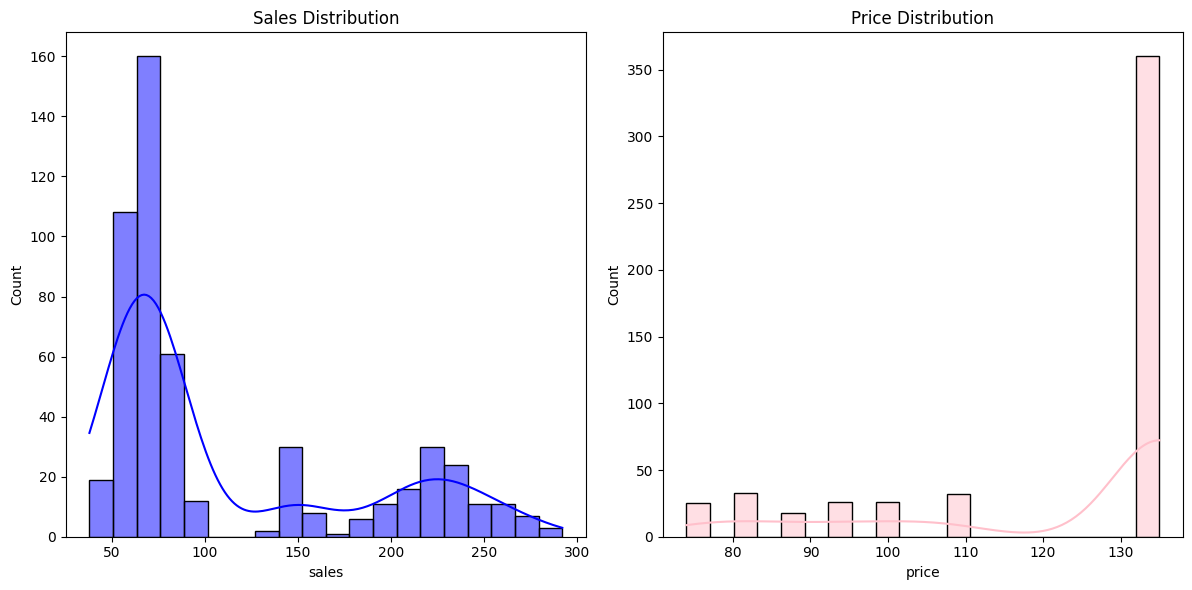

In [ ]:
plt.figure(figsize=(18, 6))

# Histogram of sales
plt.subplot(1, 3, 1)
sns.histplot(data['sales'], bins=20, kde=True, color='blue')
plt.title('Sales Distribution')

# Histogram of prices
plt.subplot(1, 3, 2)
sns.histplot(data['price'], bins=20, kde=True, color='pink')
plt.title('Price Distribution')

plt.tight_layout()
plt.show()

## Model 1
---
Price (in $) and special event indicator as an independent variable
- Calculate the predicted sales from promo (P) when directly including price and special event indicator as independent variables into a regression model.

In [ ]:
original_price = 135
new_promo_off = 25

In [ ]:
# Adding constant
X = sm.add_constant(data[['price','se_indicator']])
y = data['sales']

# Fitting the OLS Model
model_1 = sm.OLS(y, X).fit()

# Results Summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3427.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          4.66e-299
Time:                        05:39:00   Log-Likelihood:                -2253.1
No. Observations:                 520   AIC:                             4512.
Df Residuals:                     517   BIC:                             4525.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          252.0725      7.902     31.901   

Based on the OLS regression output, we can interpret the coefficients as follows:

- **Constant (const):** The coefficient of 252.0725 represents the base level of sales when the price is 0 and there is no special event (se_indicator = 0).
- **Price:** The coefficient of -1.3523 suggests that for every one unit increase in price, the sales decrease by 1.3523 units, holding all other variables constant. This negative coefficient indicates an inverse relationship between price and sales, which aligns with basic economic principles - as prices increase, demand (sales) tends to decrease.
- **se_indicator:** The coefficient of 100.9494 represents the expected increase in sales when there is a special event (se_indicator = 1), keeping the price constant. This positive coefficient suggests that special events or promotions tend to boost sales significantly.

All of the independent variables are statistically significant in contributing to sales as the outcome variable.

### Predicted Sales using Model 1

In [ ]:
discounted_price = original_price - new_promo_off

# Predicting sales for New Promo ($25 off) and Special Event = 1
sales_pred_1 = model_1.params['const'] + model_1.params['price']*discounted_price + model_1.params['se_indicator']*1

print('Predicted Sales from Model 1: $', np.round(sales_pred_1,2))

Predicted Sales from Model 1: $ 204.27


**Model 1: Predicted Sales Interpretation**

Based on the analysis using our predictive model, if we offer a $25 discount on jeans in a future week, we should expect approximately `$`204.27 sales in response. This prediction accounts for the impact of both the discount amount and the occurrence of special events on sales.

## Model 2
---
Price (as a % discount off original price) and special event indicator as an independent variable
- Calculate the predicted sales promo (P) when directly including price and special
event indicator as before, but this time replace price with a % discount variable, and
include discount as an independent variable into a regression model.

In [ ]:
# Creating the discount percentage column
data['discount_perc'] = ((original_price - data['price']) / original_price) * 100

# Adding constant
X = sm.add_constant(data[['discount_perc','se_indicator']])
y = data['sales']

# Fitting the OLS Model
model_2 = sm.OLS(y, X).fit()

# Results Summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3427.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          4.66e-299
Time:                        05:43:38   Log-Likelihood:                -2253.1
No. Observations:                 520   AIC:                             4512.
Df Residuals:                     517   BIC:                             4525.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            69.5085      0.962     72.226


Based on the OLS regression output for Model 2, the coefficients can be interpreted as follows:

- **Constant (const):** The coefficient of 69.5085 represents the base level of sales when both the discount percentage and the occurrence of special events (se_indicator) are zero.
- **Discount Percentage (discount_perc):** The coefficient of 1.8256 indicates that for every one percent increase in the discount percentage, sales are expected to increase by 1.8256 units, holding all other variables constant. This positive coefficient suggests that higher discounts lead to higher sales, reflecting the responsiveness of customers to price reductions.
- **se_indicator:** Similar to Model 1, the coefficient of 100.9494 represents the expected increase in sales when there is a special event (se_indicator = 1), keeping the discount percentage constant. This positive coefficient indicates that special events have a significant positive impact on sales, independent of the discount percentage.

All of the independent variables are statistically significant in contributing to sales as the outcome variable.

### Predicted Sales using Model 2

In [ ]:
discounted_perc = (new_promo_off / original_price) * 100

# Predicting sales for New Promo ($25 off) and Special Event = 1
sales_pred_2 = model_2.params['const'] + model_2.params['discount_perc']*discounted_perc + model_2.params['se_indicator']*1

print('Predicted Sales from Model 2: $', np.round(sales_pred_2,2))

Predicted Sales from Model 2: $ 204.27


**Model 2: Predicted Sales Interpretation**

Based on the analysis using predictive model 2, if we offer a ~18.5% discount (`$`25 off the original price of `$`135) on jeans in a future week, we should expect approximately `$`204.27 sales in response. This prediction accounts for the impact of both the discounted percentage and the occurrence of special events on sales.

## Conclusion

**Comparison and Interpretation**

Both Model 1 and Model 2 yield the same predicted sales value of `$`204.27 for a new promotional offer of `$`25 off / 18.5% off and a special event indicator set to 1.

In Model 1, the discounted price is directly calculated as the original price minus the promotional discount. The prediction equation then incorporates this discounted price along with the special event indicator and the corresponding coefficients from the regression model to estimate sales.

In Model 2, the discount percentage is calculated as the promotional discount divided by the original price, multiplied by 100 to express it as a percentage. The prediction equation in Model 2 then incorporates this discount percentage along with the special event indicator and the respective coefficients from the regression model to predict sales.

The consistency of the predicted sales values between the two models highlights the robustness and stability of the regression models. Despite the different ways of representing the promotional discount (discounted price in Model 1 vs. discount percentage in Model 2), both models produce the same result. This indicates that the models are capturing the relationship between the predictors (discount-related variables and special event indicator) and sales effectively, regardless of the specific representation of the promotional discount.

Therefore, the similarity in predicted sales values from both models reinforces the reliability of the models in forecasting sales outcomes under different promotional scenarios.